In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
dataset = pd.read_csv('./NucleosPoblacion.csv')
dataset

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873
...,...,...,...,...,...,...,...,...,...,...
847,847,848,Infante Juan Manuel,14192.0,30030,Murcia,30,Murcia,-1.124304,37.979033
848,848,849,Santa Maria de Gracia,13349.0,30030,Murcia,30,Murcia,-1.202069,37.984024
849,849,850,Vista Alegre,15208.0,30030,Murcia,30,Murcia,-1.130564,37.995715
850,850,851,Poligono Sta M de Benquerencia,19177.0,45168,Toledo,45,Toledo,-3.948364,39.866699


#### Pregunta 1
¿Cuántos Municipios tienen más de 100000 habitantes?

In [3]:
len(dataset[dataset['Poblacion'] > 100000]['Municipio'].unique())

62

R// 62 municipios

#### Pregunta 2
Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:
1. ¿Cuál es la segunda ciudad más poblada?
2. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

In [4]:
poblaciones = dataset[['Municipio', 'Poblacion']].groupby(by='Municipio').aggregate('sum').sort_values(by='Poblacion')
poblaciones = poblaciones.reset_index(drop=False)
poblaciones

,Municipio,Poblacion
0,Zumarraga,10037.0
1,Caldas de Reis,10045.0
2,Amurrio,10050.0
3,Premià de Dalt,10064.0
4,Buñol,10077.0
...,...,...
746,Zaragoza,675121.0
747,Sevilla,704198.0
748,Valencia,823595.0
749,Barcelona,1619337.0


<AxesSubplot: xlabel='Municipio'>

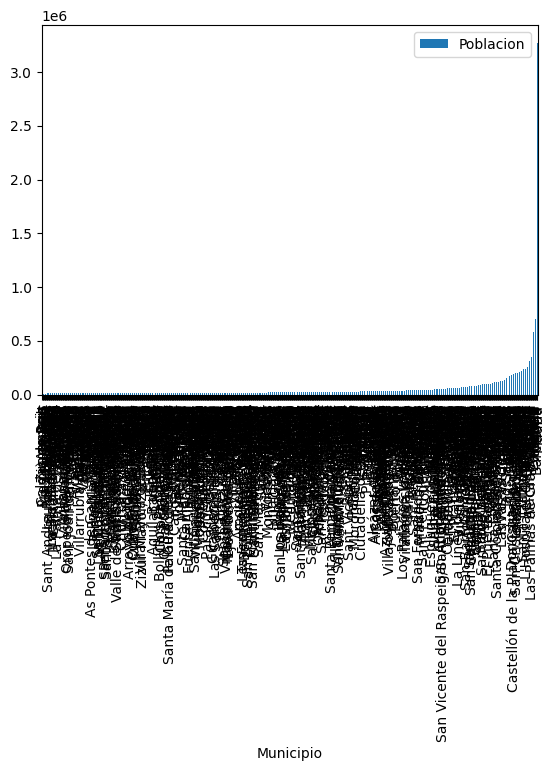

In [5]:
poblaciones.plot(x='Municipio', y='Poblacion', kind='bar')

In [6]:
poblaciones.query('Municipio == "Granada"')

,Municipio,Poblacion
731,Granada,239154.0


1. Barcelona es la segunda ciudad mas poblada
2. Granada ocupa la posicion 732

#### Pregunta 3
¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?

In [8]:
extremadura_df = dataset[dataset['Provincia'].isin(['Cáceres', 'Badajoz'])]
extremadura_df

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
41,41,42,Almendralejo,33975.0,6011,Almendralejo,6,Badajoz,-6.407780,38.684453
42,42,43,Badajoz,150376.0,6015,Badajoz,6,Badajoz,-6.970997,38.878743
43,43,44,Mérida,57127.0,6083,Mérida,6,Badajoz,-6.344172,38.917388
44,44,45,Montijo,16279.0,6088,Montijo,6,Badajoz,-6.617585,38.909787
45,45,46,Olivenza,11906.0,6095,Olivenza,6,Badajoz,-7.099598,38.685660
46,46,47,Villafranca de los Barros,13266.0,6149,Villafranca de los Barros,6,Badajoz,-6.339905,38.561153
47,47,48,Zafra,16433.0,6158,Zafra,6,Badajoz,-6.419306,38.426179
48,48,49,Cáceres,94179.0,10037,Cáceres,10,Cáceres,-6.371211,39.473168
49,49,50,Coria,12962.0,10067,Coria,10,Cáceres,-6.535874,39.984393
50,50,51,Plasencia,41447.0,10148,Plasencia,10,Cáceres,-6.092682,40.029405


In [12]:
len(extremadura_df[extremadura_df['Poblacion'] > 5000])

14

R// 14 municipios

#### Pregunta 4
¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [13]:
max_y = dataset['Y'].max()
max_y

43.6255783851

In [15]:
dataset[dataset['Y'] == max_y][['Municipio', 'Provincia', 'Poblacion']]

,Municipio,Provincia,Poblacion
104,Viveiro,Lugo,16211.0


r// El municipio es Viveiro, su provincia es Lugo y tiene una población de 16211

#### Pregunta 5
Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [16]:
granada_df = dataset[dataset['Provincia'] == 'Granada']
granada_df

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
266,266,267,Albolote,17637.0,18003,Albolote,18,Granada,-3.657480,37.230902
267,267,268,Almuñécar,27703.0,18017,Almuñécar,18,Granada,-3.690916,36.734414
268,268,269,Armilla,21895.0,18021,Armilla,18,Granada,-3.626903,37.140314
269,269,270,Atarfe,15945.0,18022,Atarfe,18,Granada,-3.688734,37.222711
270,270,271,Baza,21982.0,18023,Baza,18,Granada,-2.774856,37.490778
271,271,272,Churriana de la Vega,12448.0,18062,Churriana de la Vega,18,Granada,-3.645813,37.148857
272,272,273,Granada,239154.0,18087,Granada,18,Granada,-3.600019,37.176419
273,273,274,Guadix,20407.0,18089,Guadix,18,Granada,-3.136381,37.301611
274,274,275,Huétor Vega,11551.0,18101,Huétor Vega,18,Granada,-3.571741,37.144613
275,275,276,Illora,10386.0,18102,Illora,18,Granada,-3.881723,37.286115


In [17]:
granada_df.describe()

,FID,OBJECTID,Poblacion,CodMun,CodProvin,X,Y
count,20.00000,20.00000,20.000000,20.000000,20.0,20.000000,20.000000
mean,275.50000,276.50000,30217.850000,18140.900000,18.0,-3.606477,37.139321
std,5.91608,5.91608,50355.491715,189.385961,0.0,0.266746,0.191057
min,266.00000,267.00000,10386.000000,18003.000000,18.0,-4.152187,36.734414
25%,270.75000,271.75000,13146.500000,18052.250000,18.0,-3.689279,37.131378
50%,275.50000,276.50000,17526.000000,18112.000000,18.0,-3.631257,37.171351
75%,280.25000,281.25000,21739.750000,18154.250000,18.0,-3.587665,37.230955
max,285.00000,286.00000,239154.000000,18905.000000,18.0,-2.774856,37.490778


- Media: 30217.85
- Mediana: 17526
- Desviacion: 50355.491715
- Maximo: 239154
- Minimo: 10386

#### Pregunta 6
Realice un histograma con la población de los Municipios para cada una de las provincias.

In [24]:
provincias_df = dataset[['Provincia', 'Poblacion']].groupby(by='Provincia').aggregate('sum')
provincias_df = provincias_df.reset_index(drop=False)
provincias_df

,Provincia,Poblacion
0,A Coruña,818982.0
1,Alacant/Alicante,1804252.0
2,Albacete,280673.0
3,Almería,550604.0
4,Asturias,965777.0
5,Badajoz,361700.0
6,Barcelona,4934795.0
7,Burgos,250766.0
8,Cantabria,437448.0
9,Castelló/Castellón,476388.0


<AxesSubplot: ylabel='Frequency'>

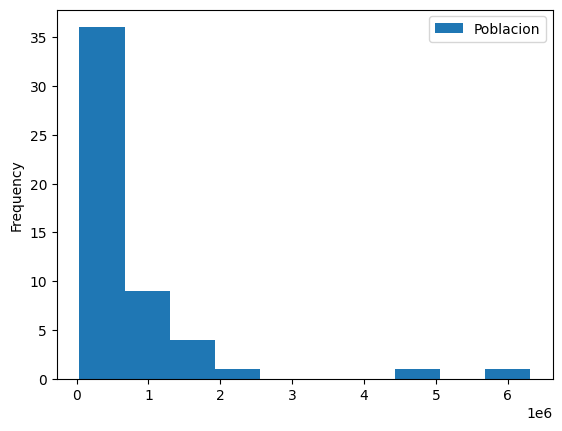

In [25]:
provincias_df.plot(kind='hist', x='Provincia')

#### Pregunta 7
Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?

In [27]:
muestra_df = dataset.drop_duplicates(subset=['Municipio']).sample(n=50)
muestra_df

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
350,350,351,Galapagar,32393.0,28061,Galapagar,28,Madrid,-4.003986,40.578376
8,8,9,Pájara,20622.0,35015,Pájara,35,Las Palmas,-14.105631,28.349752
600,600,601,Calvià,51462.0,7011,Calvià,7,Illes Balears,2.502483,39.565889
730,730,731,Amposta,21365.0,43014,Amposta,43,Tarragona,0.578310,40.710388
395,395,396,Nerja,21957.0,29075,Nerja,29,Málaga,-3.874373,36.751156
56,56,57,El Puerto de Santa María,88503.0,11027,El Puerto de Santa María,11,Cádiz,-6.229156,36.600124
533,533,534,Xirivella,30910.0,46110,Xirivella,46,València/Valencia,-0.425240,39.465751
434,434,435,Estella/Lizarra,14207.0,31097,Estella/Lizarra,31,Navarra,-2.031399,42.671849
441,441,442,Cabanaquinta/Cabañaquinta,12582.0,33002,Aller,33,Asturias,-5.623914,43.161789


In [29]:
print('Promedio ', muestra_df['Poblacion'].mean())
print('Desviacion ', muestra_df['Poblacion'].std())

Promedio  33424.32
Desviacion  33704.24866540704


r// El promedio es 33424.32 y la desviacion de 33704.2486

#### Pregunta 8
Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [32]:
x_madrid = dataset[dataset['Municipio'] == 'Madrid']['X'].sum()
y_madrid = dataset[dataset['Municipio'] == 'Madrid']['Y'].sum()
x_madrid, y_madrid

(-3.703797076, 40.4166300011)

In [33]:
resto_municipios_df = dataset[dataset['Municipio'] != 'Madrid']
resto_municipios_df

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873
...,...,...,...,...,...,...,...,...,...,...
847,847,848,Infante Juan Manuel,14192.0,30030,Murcia,30,Murcia,-1.124304,37.979033
848,848,849,Santa Maria de Gracia,13349.0,30030,Murcia,30,Murcia,-1.202069,37.984024
849,849,850,Vista Alegre,15208.0,30030,Murcia,30,Murcia,-1.130564,37.995715
850,850,851,Poligono Sta M de Benquerencia,19177.0,45168,Toledo,45,Toledo,-3.948364,39.866699


Utilizando la formula de distancia entre dos puntos

In [42]:
resto_municipios_df['DistanciaMadrid'] = np.sqrt(pow(resto_municipios_df['X'] - x_madrid, 2) + pow(resto_municipios_df['Y'] - y_madrid, 2))
resto_municipios_df = resto_municipios_df.sort_values(by='DistanciaMadrid').reset_index(drop=True)
resto_municipios_df

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y,DistanciaMadrid
0,783,784,Humera-Somosaguas-prado del Rey,14800.0,28115,Pozuelo de Alarcón,28,Madrid,-3.783853,40.428764,0.080970
1,780,781,El Bercial,12814.0,28065,Getafe,28,Madrid,-3.736771,40.327270,0.095249
2,781,782,Fortuna,12840.0,28074,Leganés,28,Madrid,-3.780326,40.358067,0.096365
3,354,355,Leganés,187227.0,28074,Leganés,28,Madrid,-3.766556,40.331744,0.105567
4,365,366,Pozuelo de Alarcón,82804.0,28115,Pozuelo de Alarcón,28,Madrid,-3.815816,40.435940,0.113671
...,...,...,...,...,...,...,...,...,...,...,...
846,21,22,Adeje,43801.0,38001,Adeje,38,Santa Cruz de Tenerife,-16.729708,28.118880,17.913933
847,764,765,Playa de las Américas,18562.0,38001,Adeje,38,Santa Cruz de Tenerife,-16.729436,28.068070,17.948654
848,765,766,Los Cristianos,19383.0,38006,Arona,38,Santa Cruz de Tenerife,-16.716798,28.053827,17.949292
849,35,36,Santa Cruz de la Palma,17128.0,38037,Santa Cruz de la Palma,38,Santa Cruz de Tenerife,-17.765386,28.684138,18.313373


In [43]:
print('Mas cercano: ', resto_municipios_df.iloc[0]['Municipio'])
print('Mas lejano: ', resto_municipios_df.iloc[len(resto_municipios_df) - 1]['Municipio'])

Mas cercano:  Pozuelo de Alarcón
Mas lejano:  Los Llanos de Aridane


r// El mas cercano es Pozuelo de Alarcón y el mas lejano es Los Llanos de Aridane